In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')


In [3]:
train = train_df.copy()
test= test_df.copy()

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [6]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print(test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [8]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
print(test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace= True)

In [13]:
train['Age'].median()

28.0

In [14]:
train['Embarked'].mode()[0]

'S'

In [15]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [16]:
print(train.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [17]:
test['Age'].median()

27.0

In [18]:
test['Fare'].median()

14.4542

In [19]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [20]:
print(test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [21]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [23]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [24]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [25]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [26]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [27]:
test['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [28]:
test['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [29]:
test['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [30]:
test['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [31]:
test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

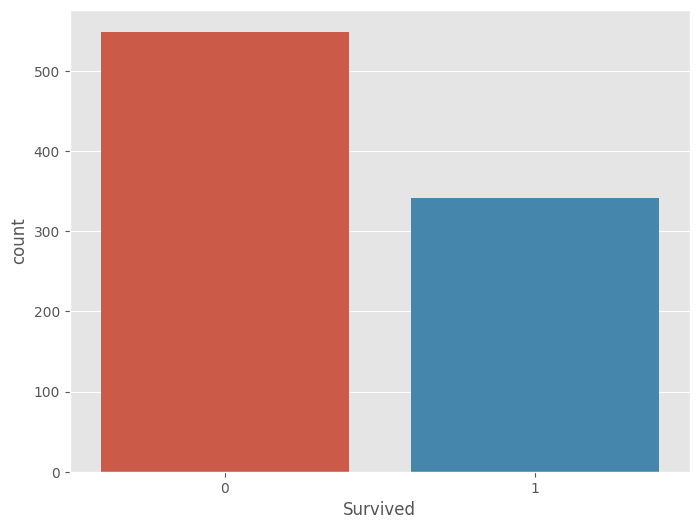

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data= train)

<Axes: xlabel='Sex', ylabel='count'>

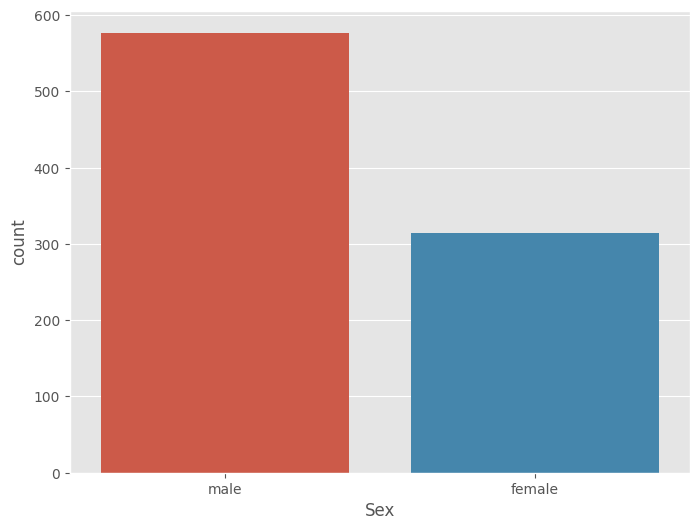

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data= train)

<Axes: xlabel='Survived', ylabel='count'>

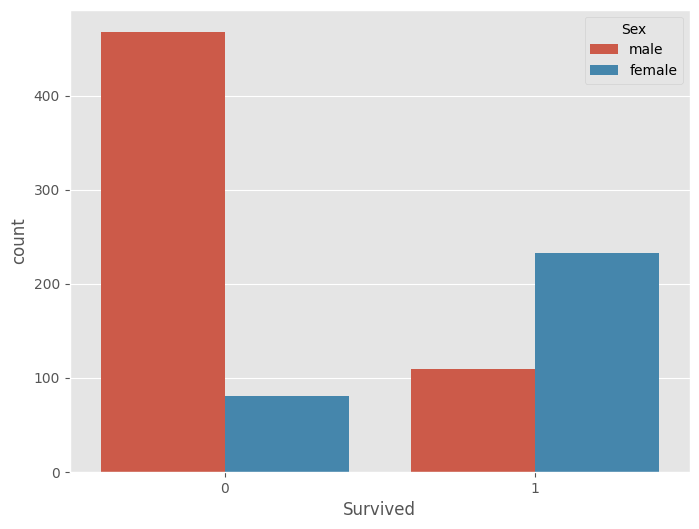

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data= train)

<Axes: xlabel='Survived', ylabel='count'>

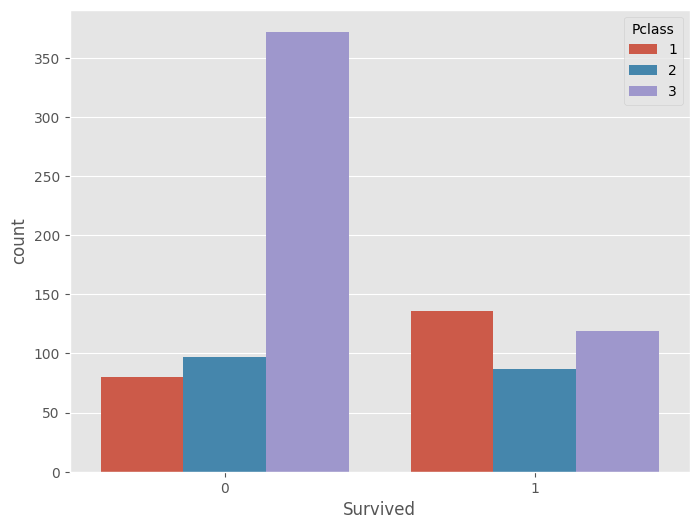

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Pclass', data= train)

<Axes: xlabel='Survived', ylabel='Age'>

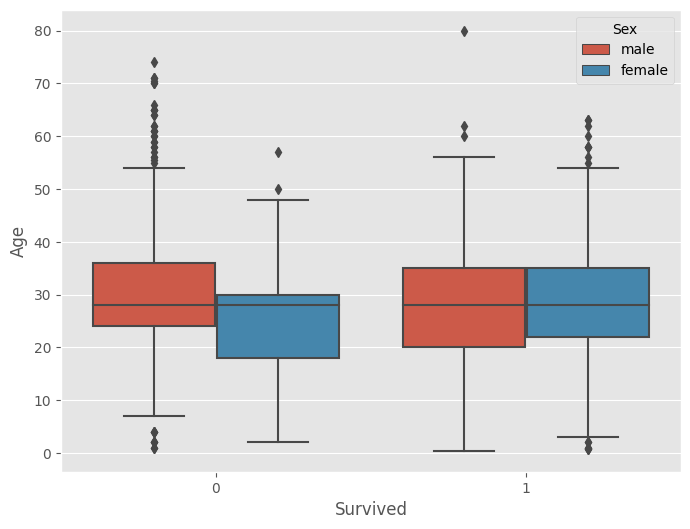

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y= 'Age', hue='Sex', data= train)

<Axes: xlabel='Pclass', ylabel='Fare'>

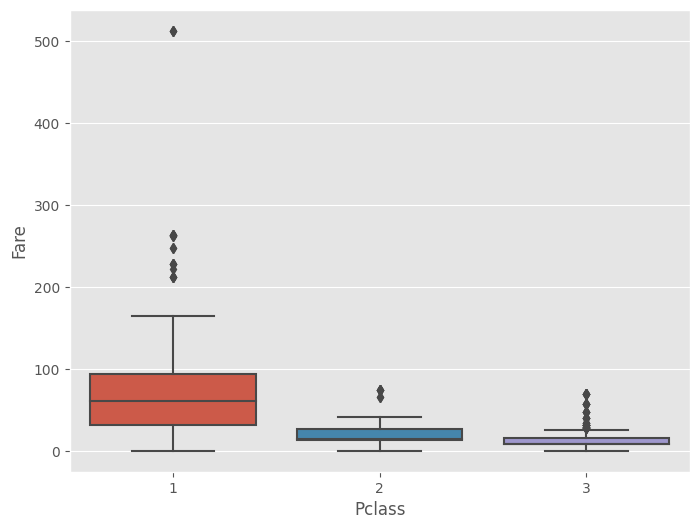

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y= 'Fare', data= train)

<Axes: xlabel='Sex', ylabel='count'>

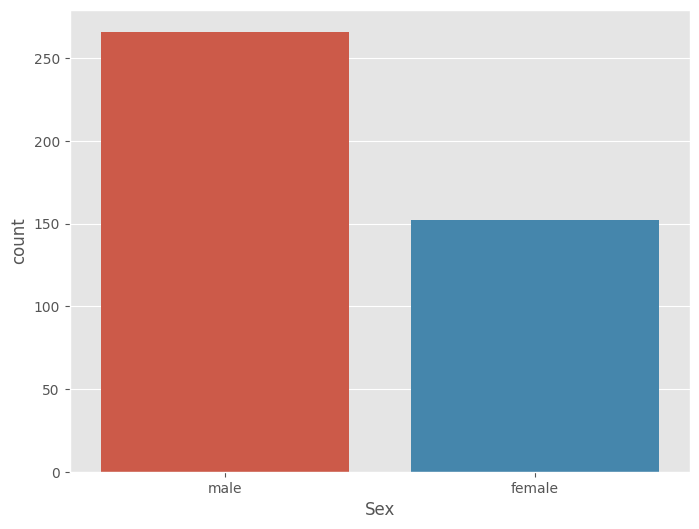

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data= test)

<Axes: xlabel='Pclass', ylabel='Fare'>

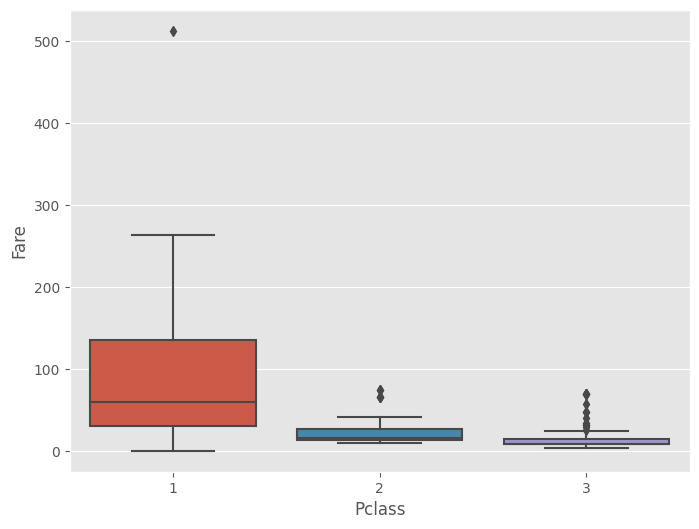

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y= 'Fare', data= test)

<Axes: >

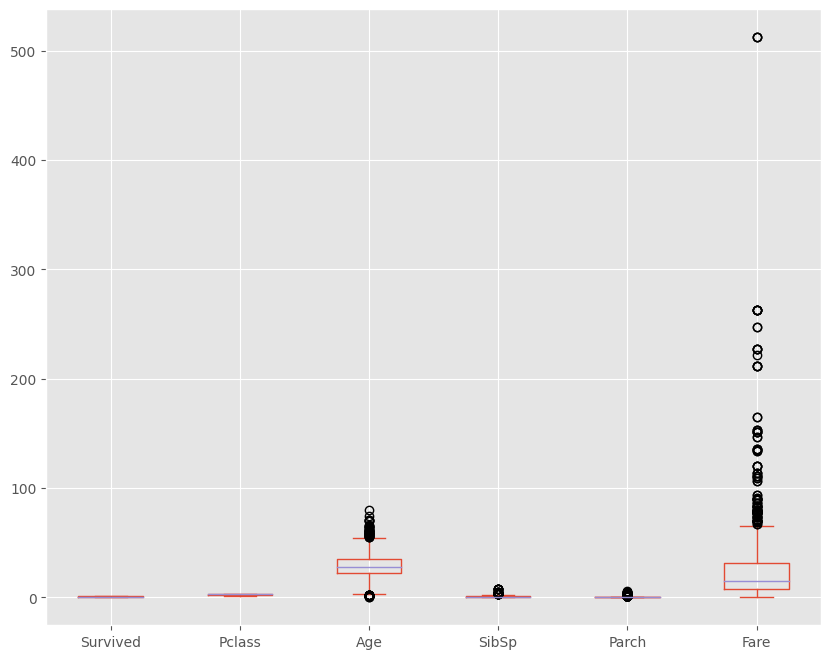

In [40]:
train.plot(kind='box', figsize= (10,8))

In [41]:
cols= ['Age', 'SibSp', 'Parch', 'Fare']

train[cols]= train[cols].clip(lower= train[cols].quantile(0.15), upper= train[cols].quantile(0.85), axis=1)

train.drop(columns=['Parch'], axis=1, inplace=True)

<Axes: >

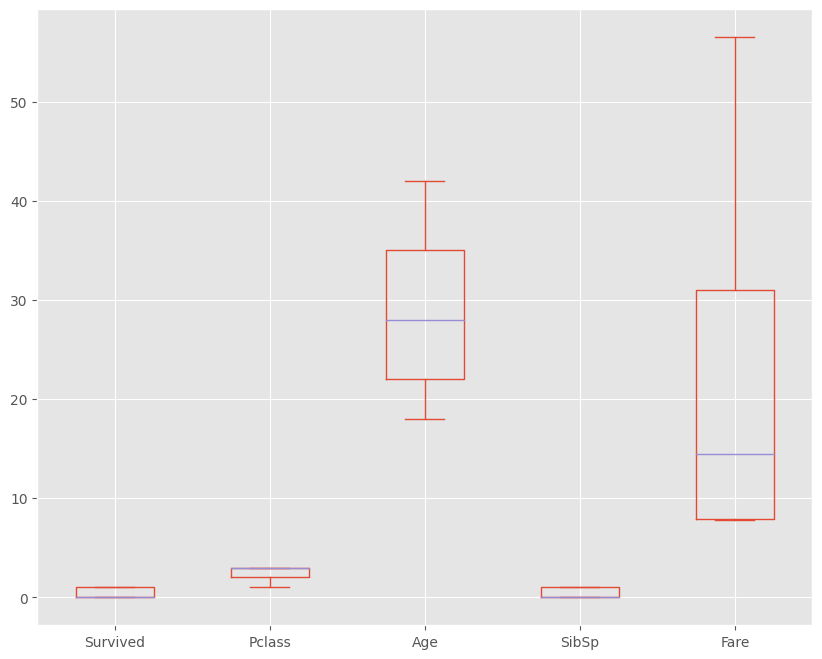

In [42]:
train.plot(kind='box', figsize= (10,8)) 

<Axes: >

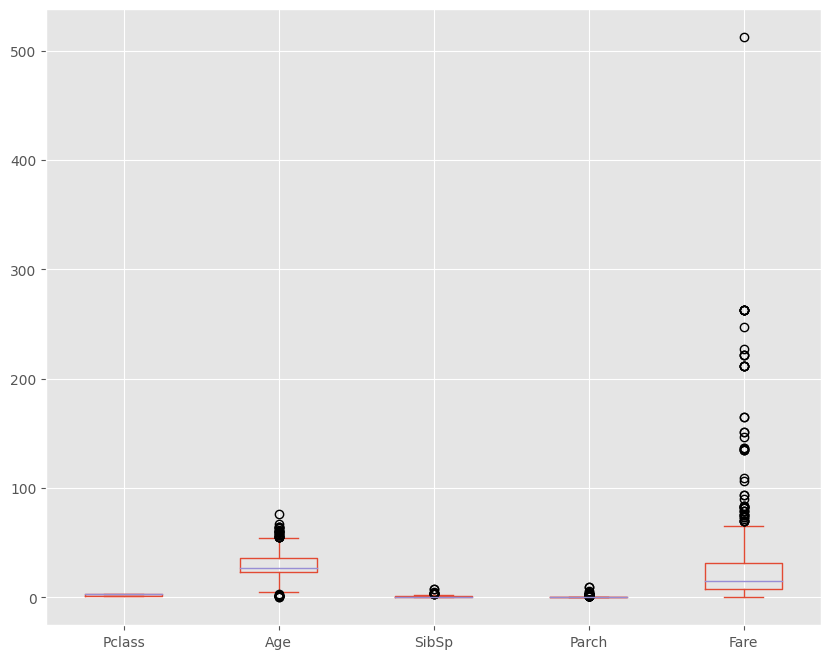

In [43]:
test.plot(kind='box', figsize= (10,8))

In [44]:
test[cols]= test[cols].clip(lower= test[cols].quantile(0.15), upper= test[cols].quantile(0.85), axis=1)

test.drop(columns=['Parch'], axis=1, inplace=True)

<Axes: >

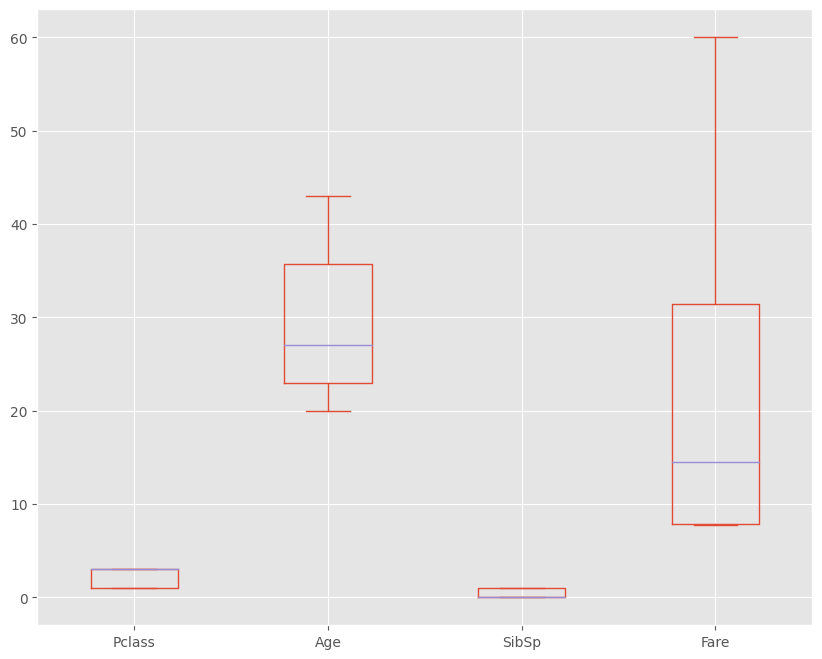

In [45]:
test.plot(kind='box', figsize= (10,8))  

In [46]:
train= pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

test= pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

In [47]:
train.head()

,Survived,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,7.7500,False,True,True,False,True
1,1,38.0,1,56.4958,False,False,False,False,False
2,1,26.0,0,7.9250,False,True,False,False,True
3,1,35.0,1,53.1000,False,False,False,False,True
4,0,35.0,0,8.0500,False,True,True,False,True


In [48]:
test.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,7.8292,False,True,True,True,False
1,43.0,1,7.7500,False,True,False,False,True
2,43.0,0,9.6875,True,False,True,True,False
3,27.0,0,8.6625,False,True,True,False,True
4,22.0,1,12.2875,False,True,False,False,True


In [49]:
X_train= train.iloc[:, 1:]
y_train= train['Survived'].values.reshape(-1,1)

X_test= test

In [50]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [51]:
features= ['Age', 'SibSp', 'Fare']

X_train[features]= ss.fit_transform(X_train[features])
X_test[features]= ss.fit_transform(X_test[features])

In [52]:
X_train.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.865086,1.465746,-0.853616,False,True,True,False,True
1,1.123252,1.465746,1.876088,False,False,False,False,False
2,-0.368001,-0.682247,-0.843816,False,True,False,False,True
3,0.750438,1.465746,1.685928,False,False,False,False,True
4,0.750438,-0.682247,-0.836817,False,True,True,False,True


In [53]:
X_test.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.660130,-0.690675,-0.830005,False,True,True,True,False
1,1.731843,1.447859,-0.834124,False,True,False,False,True
2,1.731843,-0.690675,-0.733364,True,False,True,True,False
3,-0.285498,-0.690675,-0.786669,False,True,True,False,True
4,-0.915918,1.447859,-0.598151,False,True,False,False,True


In [54]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()

clf.fit(X_train, y_train.ravel())

predictions= clf.predict(X_test)

In [55]:
print(clf.score(X_train, y_train))

0.792368125701459


In [56]:
submission= pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': predictions })

print(submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [57]:
filename= 'titanic predictions.csv'
submission.to_csv(filename, index=False)